In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

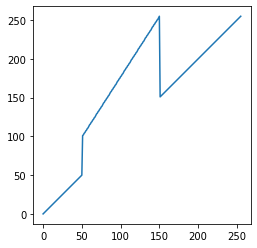

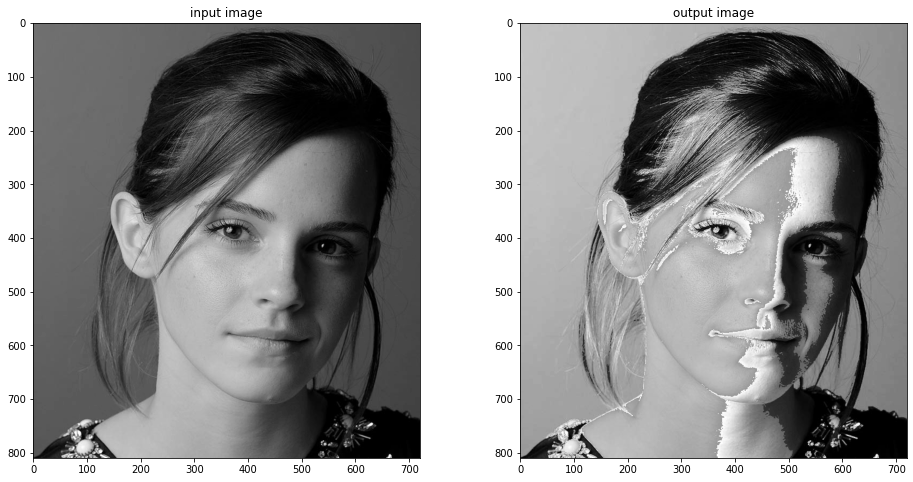

In [7]:
img = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

#creating lookup table
t1 = np.linspace(0, 50, 51)
t2 = np.linspace(101, 255, 100)
t3 = np.linspace(151, 255, 105)

t = np.concatenate((t1,t2,t3)).astype(np.uint8)
assert len(t)==256

fig, ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')


#transformation
new_img = cv.LUT(img, t)

#plotting images
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('input image')
ax[1].imshow(new_img, cmap='gray',  vmin=0, vmax=255)
ax[1].set_title('output image')
plt.show()

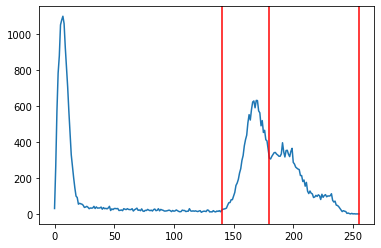

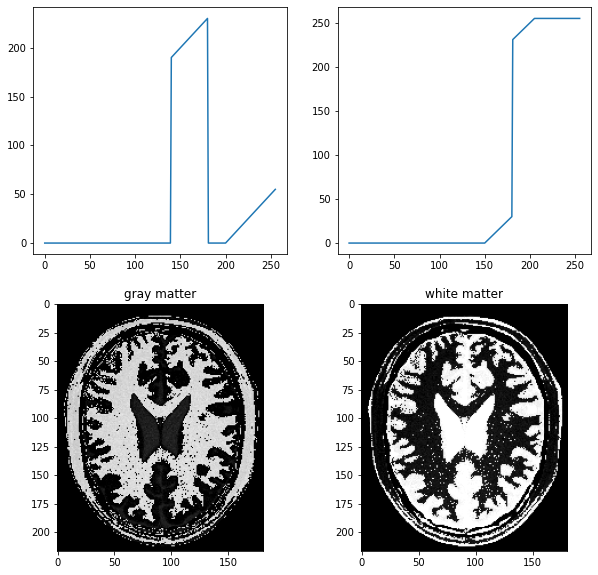

In [8]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

#brain image histogram
plt.plot(cv.calcHist([img], [0],None, [256], [0,256]))

#by observing the histogram
#assuming from 140 to 180 belongs to gray matter
#assuming above 180 belongs to white matter
plt.axvline(x=140, color='r')
plt.axvline(x=180, color='r')
plt.axvline(x=255, color='r')

#transformation gray
t1 = np.linspace(0, 255, 256)
t1[140:181] += 250
t1 -= 200
t1 = np.array([0 if i<0 else i for i in t1])
assert len(t1)==256


#transformation white
t2 = np.linspace(0, 255, 256)
t2[181:] += 200
t2 -= 150
t2 = np.array([0 if i<0 else i for i in t2])
t2 = np.array([255 if i>255 else i for i in t2])
assert len(t2)==256

g = cv.LUT(img, t1)
w = cv.LUT(img, t2)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].plot(t1)
ax[0,1].plot(t2)
ax[1,0].imshow(g, cmap='gray',vmin=0, vmax=255)
ax[1,0].set_title('gray matter')
ax[1,1].imshow(w, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('white matter')
plt.show()



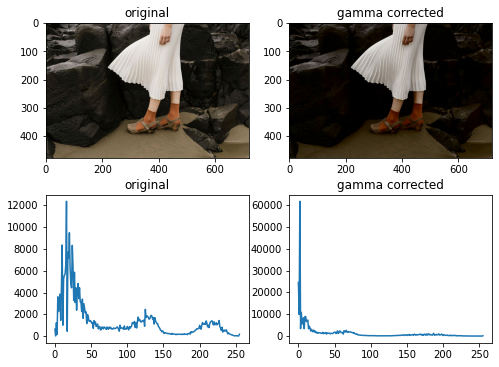

Gamma = 2


In [55]:
img = cv.imread(r'highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None

img = cv.cvtColor(img, cv.COLOR_BGR2Lab)
g = img.copy()

gamma = 2
t = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
g[:,:,0] = cv.LUT(g[:,:,0], t)

img = cv.cvtColor(img, cv.COLOR_Lab2RGB)
g = cv.cvtColor(g, cv.COLOR_Lab2RGB)

fig, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].imshow(img)
ax[0,0].set_title('original')
ax[0,1].imshow(g)
ax[0,1].set_title('gamma corrected')
ax[1,0].plot(cv.calcHist([img], [0],None, [256], [0,256]))
ax[1,0].set_title('original')
ax[1,1].plot(cv.calcHist([g], [0],None, [256], [0,256]))
ax[1,1].set_title('gamma corrected')
plt.show()
print('Gamma =',gamma)

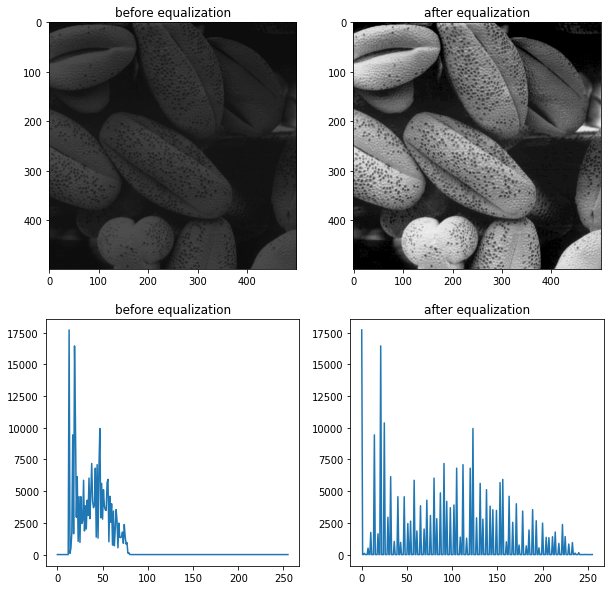

In [79]:
img = cv.imread('shells.png', cv.IMREAD_GRAYSCALE)
assert img is not None

#equalization
maxv = np.max(img)
minv = np.min(img)
e = np.uint8(((img-minv)/(maxv-minv))*255)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(img, cmap='gray',vmin=0, vmax=255)
ax[0,0].set_title('before equalization')
ax[0,1].imshow(e, cmap='gray',vmin=0, vmax=255)
ax[0,1].set_title('after equalization')
ax[1,0].plot(cv.calcHist([img], [0], None, [256], [0,256]))
ax[1,0].set_title('before equalization')
ax[1,1].plot(cv.calcHist([e], [0], None, [256], [0,256]))
ax[1,1].set_title('after equalization')
plt.show()
#plt.plot(cv.calcHist([img], [0],None, [256], [0,256]))